# Multiple Linear Regression
## Housing Case Study

#### Problem Statement:

Consider a real estate company that has a dataset containing the prices of properties in the Delhi region. It wishes to use the data to optimise the sale prices of the properties based on important factors such as area, bedrooms, parking, etc.

Essentially, the company wants —


- To identify the variables affecting house prices, e.g. area, number of rooms, bathrooms, etc.

- To create a linear model that quantitatively relates house prices with variables such as number of rooms, area, number of bathrooms, etc.

- To know the accuracy of the model, i.e. how well these variables can predict house prices.

**So interpretation is important!**

### Step 1: Reading and Understanding the Data

In [184]:
#supress warnings

import warnings
warnings.filterwarnings("ignore")

In [185]:
# importing libraries 

import numpy as np
import pandas as pd

In [186]:
# getting the data

housing_data = pd.read_csv("Housing.csv.csv")

In [187]:
# reading the data

housing_data.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [188]:
housing_data.tail(20)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
525,2345000,3640,2,1,1,yes,no,no,no,no,0,no,unfurnished
526,2310000,3180,2,1,1,yes,no,no,no,no,0,no,unfurnished
527,2275000,1836,2,1,1,no,no,yes,no,no,0,no,semi-furnished
528,2275000,3970,1,1,1,no,no,no,no,no,0,no,unfurnished
529,2275000,3970,3,1,2,yes,no,yes,no,no,0,no,unfurnished
530,2240000,1950,3,1,1,no,no,no,yes,no,0,no,unfurnished
531,2233000,5300,3,1,1,no,no,no,no,yes,0,yes,unfurnished
532,2135000,3000,2,1,1,no,no,no,no,no,0,no,unfurnished
533,2100000,2400,3,1,2,yes,no,no,no,no,0,no,unfurnished
534,2100000,3000,4,1,2,yes,no,no,no,no,0,no,unfurnished


In [189]:
housing_data.shape

(545, 13)

#### Observation: As of now, The dataset has 545 rows and 13 colums

In [190]:
# Checking the data types

housing_data.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [191]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [192]:
housing_data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,545.00,545.00,545.00,545.00,545.00,545.00
mean,"4,766,729.25","5,150.54",2.97,1.29,1.81,0.69
std,"1,870,439.62","2,170.14",0.74,0.50,0.87,0.86
min,"1,750,000.00","1,650.00",1.00,1.00,1.00,0.00
25%,"3,430,000.00","3,600.00",2.00,1.00,1.00,0.00
50%,"4,340,000.00","4,600.00",3.00,1.00,2.00,0.00
75%,"5,740,000.00","6,360.00",3.00,2.00,2.00,1.00
max,"13,300,000.00","16,200.00",6.00,4.00,4.00,3.00


In [193]:
# Standadizing the data format

pd.options.display.float_format = '{:,.2f}'.format

In [194]:
housing_data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,545.00,545.00,545.00,545.00,545.00,545.00
mean,"4,766,729.25","5,150.54",2.97,1.29,1.81,0.69
std,"1,870,439.62","2,170.14",0.74,0.50,0.87,0.86
min,"1,750,000.00","1,650.00",1.00,1.00,1.00,0.00
25%,"3,430,000.00","3,600.00",2.00,1.00,1.00,0.00
50%,"4,340,000.00","4,600.00",3.00,1.00,2.00,0.00
75%,"5,740,000.00","6,360.00",3.00,2.00,2.00,1.00
max,"13,300,000.00","16,200.00",6.00,4.00,4.00,3.00


In [195]:
missing_values = round(100*(housing_data.isnull().sum()/len(housing_data.index)), 2)
missing_values

price              0.00
area               0.00
bedrooms           0.00
bathrooms          0.00
stories            0.00
mainroad           0.00
guestroom          0.00
basement           0.00
hotwaterheating    0.00
airconditioning    0.00
parking            0.00
prefarea           0.00
furnishingstatus   0.00
dtype: float64

In [196]:
mv = housing_data.isnull().sum()
mv.values.tolist()

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

#### Observation: As there is no null data we can proceed to Data Visualization to get the clear understanding of the data

## Step 2: Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

In [197]:
# Importing libraries

import matplotlib.pyplot as plt
import seaborn as sns

In [198]:
sns.pairplot(housing_data)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

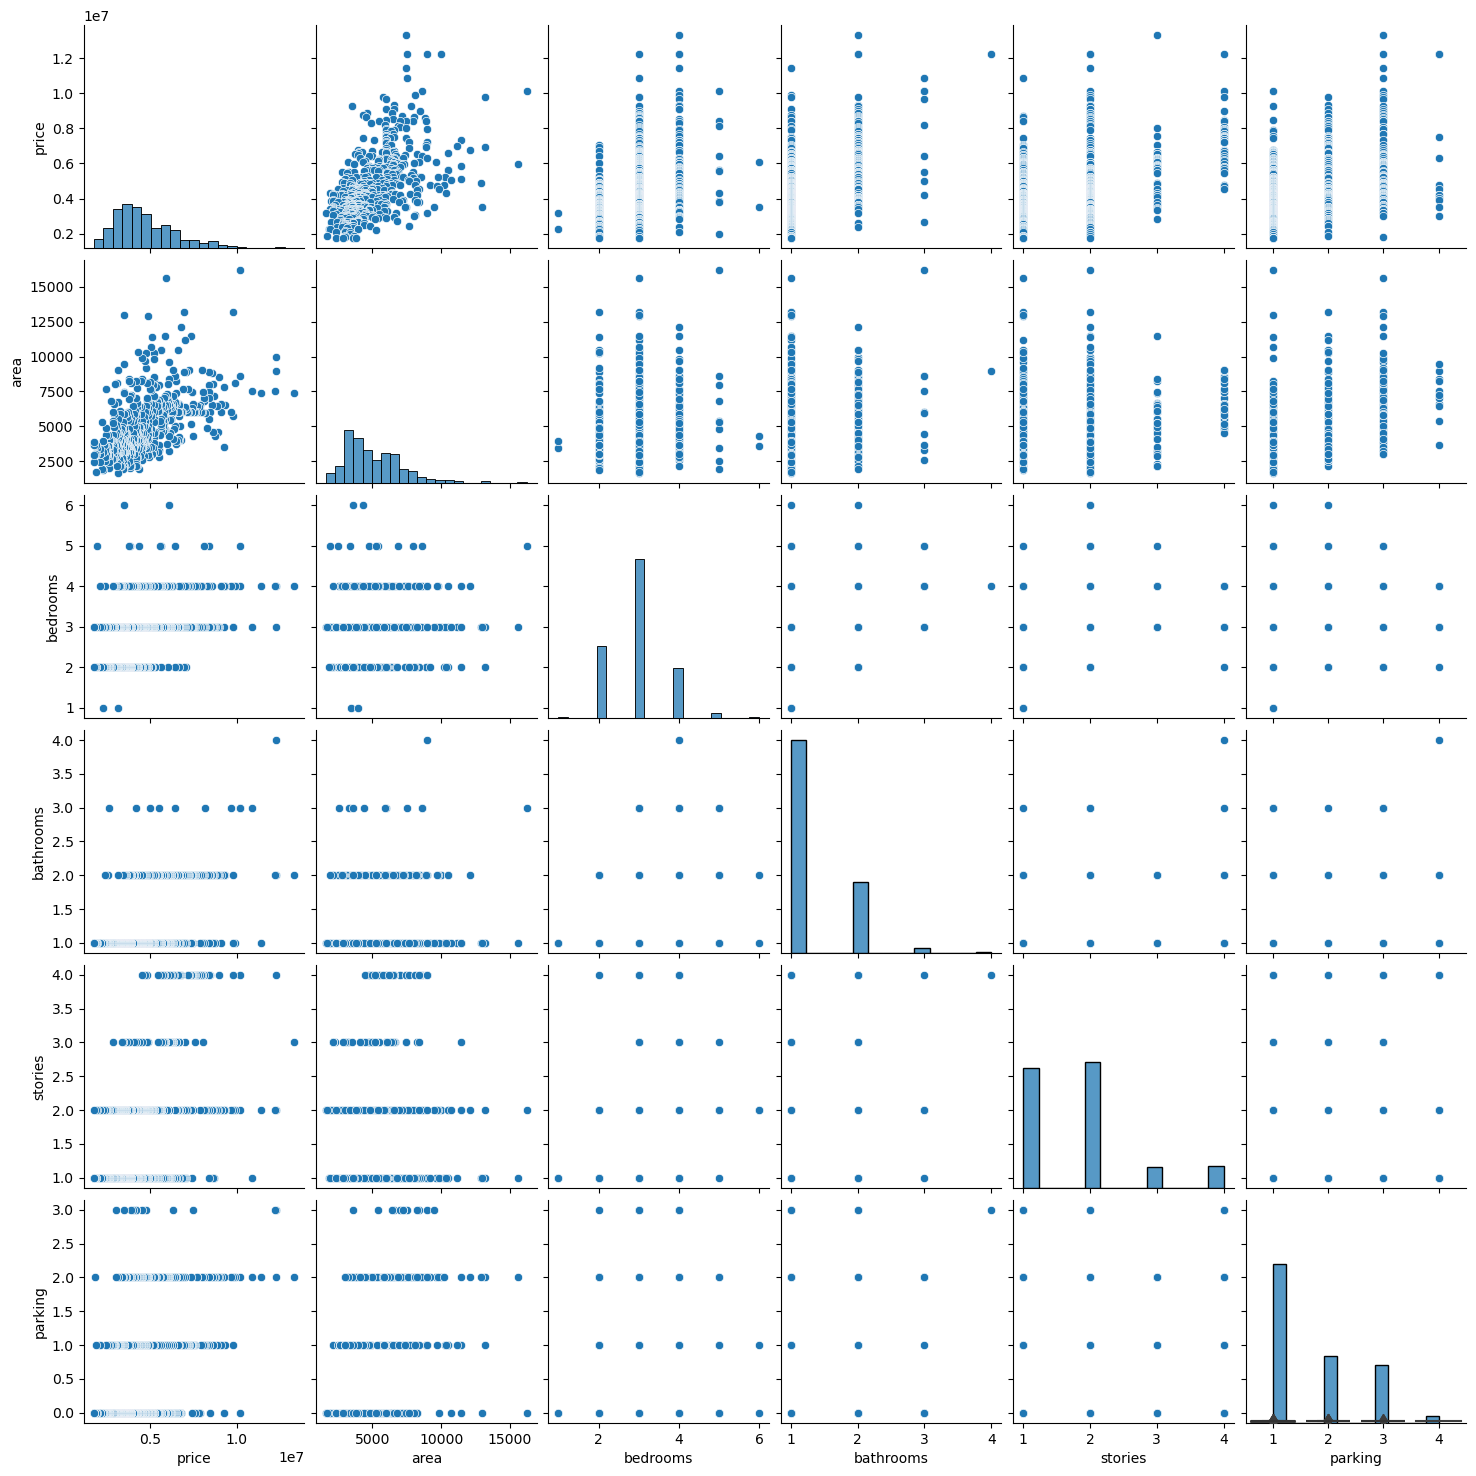

In [199]:
sns.boxenplot(x = "bathrooms", y = 'bedrooms', data = housing_data)
plt.show()

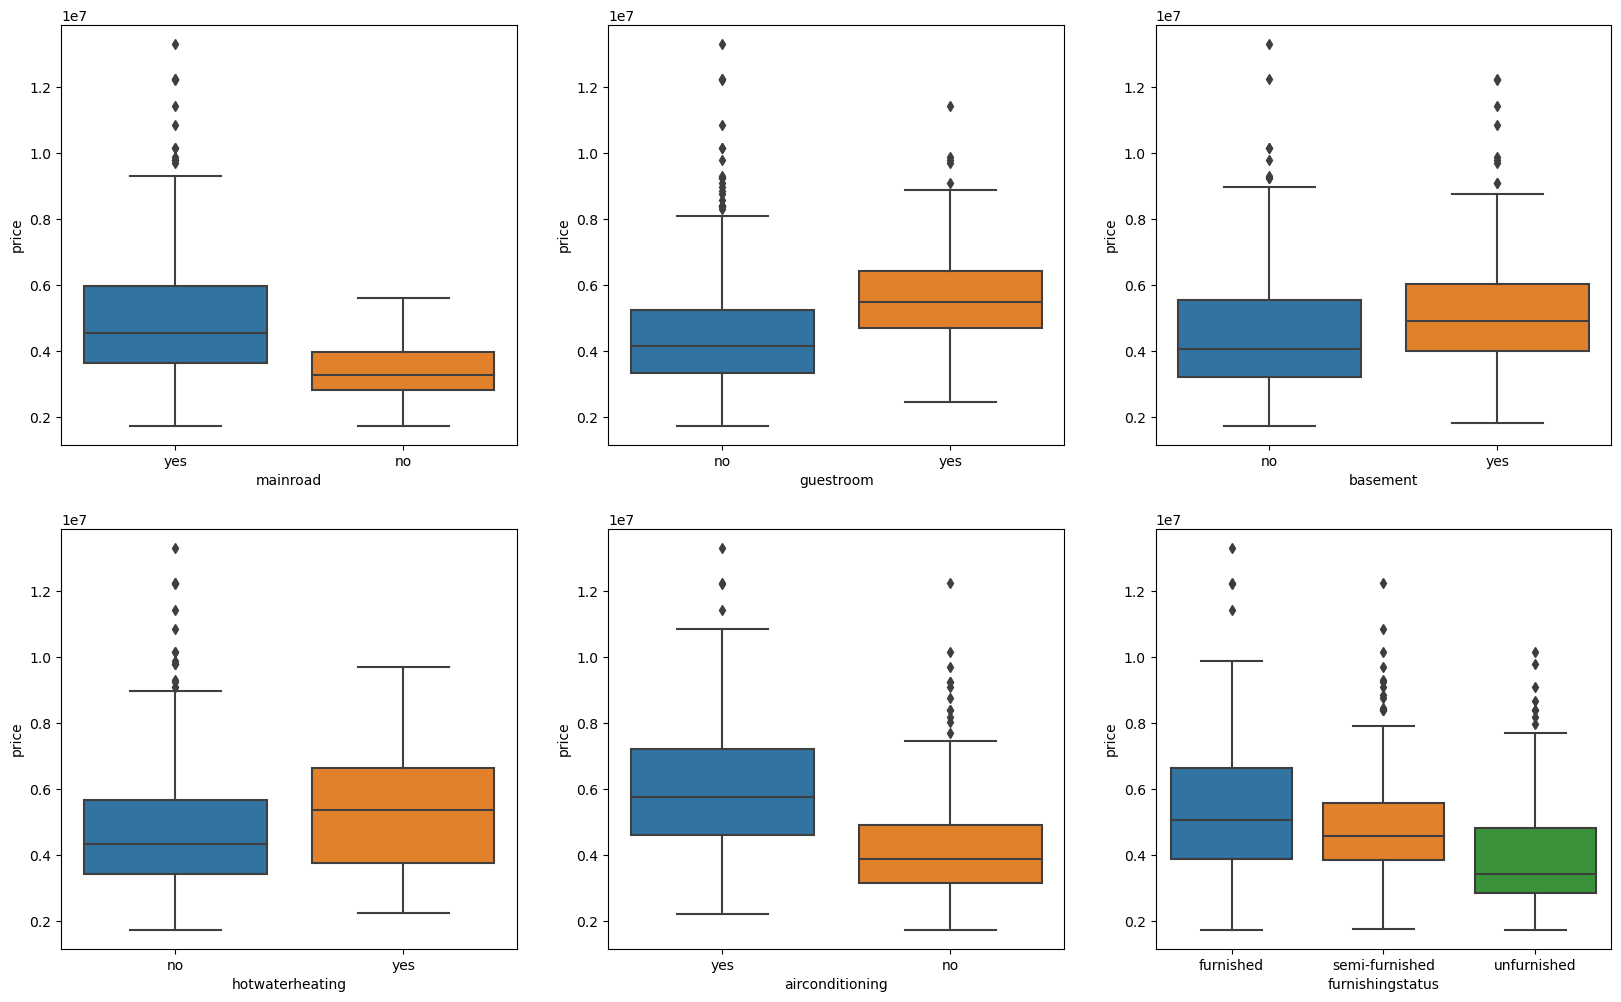

In [200]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'mainroad', y = 'price', data = housing_data)
plt.subplot(2,3,2)
sns.boxplot(x = 'guestroom', y = 'price', data = housing_data)
plt.subplot(2,3,3)
sns.boxplot(x = 'basement', y = 'price', data = housing_data)
plt.subplot(2,3,4)
sns.boxplot(x = 'hotwaterheating', y = 'price', data = housing_data)
plt.subplot(2,3,5)
sns.boxplot(x = 'airconditioning', y = 'price', data = housing_data)
plt.subplot(2,3,6)
sns.boxplot(x = 'furnishingstatus', y = 'price', data = housing_data)
plt.show()

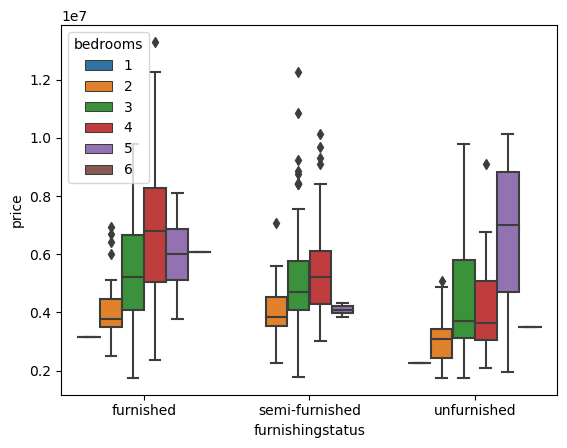

In [201]:
sns.boxplot(x = 'furnishingstatus', y = 'price', hue = 'bedrooms' ,data = housing_data)
plt.show()

In [202]:
housing_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


## Step 3: Data Preparation

- You can see that your dataset has many columns with values as 'Yes' or 'No'.

- But in order to fit a regression line, we would need numerical values and not string. Hence, we need to convert them to 1s and 0s, where 1 is a 'Yes' and 0 is a 'No'.

In [203]:
housing_data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [204]:
# List of variables to map

varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, "no": 0})

# Applying the function to the housing list
housing_data[varlist] = housing_data[varlist].apply(binary_map)

In [205]:
housing_data.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished
5,10850000,7500,3,3,1,1,0,1,0,1,2,1,semi-furnished
6,10150000,8580,4,3,4,1,0,0,0,1,2,1,semi-furnished
7,10150000,16200,5,3,2,1,0,0,0,0,0,0,unfurnished
8,9870000,8100,4,1,2,1,1,1,0,1,2,1,furnished
9,9800000,5750,3,2,4,1,1,0,0,1,1,1,unfurnished


### Dummy Variables

In [206]:
status_of_furnishing = pd.get_dummies(housing_data['furnishingstatus'])

In [207]:
status_of_furnishing.head(10)

,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0
5,0,1,0
6,0,1,0
7,0,0,1
8,1,0,0
9,0,0,1


Now, you don't need three columns. You can drop the `furnished` column, as the type of furnishing can be identified with just the last two columns where — 
- `00` will correspond to `furnished`
- `01` will correspond to `unfurnished`
- `10` will correspond to `semi-furnished`

In [208]:
# Let's drop the first column from status df using 'drop_first = True'

status_of_furnishing = pd.get_dummies(housing_data['furnishingstatus'], drop_first= True)

In [209]:
# Add the results to the original housing dataframe

housing_data = pd.concat([housing_data, status_of_furnishing], axis =1)

In [210]:
housing_data.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0
5,10850000,7500,3,3,1,1,0,1,0,1,2,1,semi-furnished,1,0
6,10150000,8580,4,3,4,1,0,0,0,1,2,1,semi-furnished,1,0
7,10150000,16200,5,3,2,1,0,0,0,0,0,0,unfurnished,0,1
8,9870000,8100,4,1,2,1,1,1,0,1,2,1,furnished,0,0
9,9800000,5750,3,2,4,1,1,0,0,1,1,1,unfurnished,0,1


In [211]:
housing_data.drop(['furnishingstatus'], axis =1, inplace=True)

In [212]:
housing_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


## Step 4: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [213]:
from sklearn.model_selection import train_test_split

# random number generator for more predictable and reproducible
# We specify this so that the train and test data set always have the same rows, respectively

np.random.seed(0)

df_train, df_test = train_test_split(housing_data, train_size = 0.7, test_size = 0.3, random_state = 100)


In [214]:
df_train.shape

(381, 14)

In [215]:
df_test.shape

(164, 14)

In [216]:
df_train.head(8)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,3710000,3600,3,1,1,1,0,0,0,0,1,0,0,1
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,1,0
159,5460000,3150,3,2,1,1,1,1,0,1,0,0,0,0
35,8080940,7000,3,2,4,1,0,0,0,1,2,0,0,0
28,8400000,7950,5,2,2,1,0,1,1,0,2,0,0,1
267,4403000,4920,3,1,2,1,0,0,0,0,1,0,1,0
263,4410000,3968,3,1,2,0,0,0,0,0,0,0,1,0
433,3290000,3480,4,1,2,0,0,0,0,0,1,0,1,0


### Rescaling the Features 

As you saw in the demonstration for Simple Linear Regression, scaling doesn't impact your model. Here we can see that except for `area`, all the columns have small integer values. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:

1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 

This time, we will use MinMax scaling.

In [217]:
from sklearn.preprocessing import MinMaxScaler

In [218]:
scaling = MinMaxScaler()

In [219]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

num_vars = ['price', 'area', 'bedrooms', 'bathrooms', 'stories','parking']

df_train[num_vars] = scaling.fit_transform(df_train[num_vars])

In [220]:
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,0.17,0.16,0.40,0.00,0.00,1,0,0,0,0,0.33,0,0,1
19,0.62,0.40,0.40,0.50,0.33,1,0,0,0,1,0.33,1,1,0
159,0.32,0.12,0.40,0.50,0.00,1,1,1,0,1,0.00,0,0,0
35,0.55,0.45,0.40,0.50,1.00,1,0,0,0,1,0.67,0,0,0
28,0.58,0.54,0.80,0.50,0.33,1,0,1,1,0,0.67,0,0,1


In [221]:
df_test.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
265,4403000,2880,3,1,2,1,0,0,0,0,0,1,1,0
54,7350000,6000,3,2,2,1,1,0,0,1,1,0,1,0
171,5250000,10269,3,1,1,1,0,0,0,0,1,1,1,0
244,4550000,5320,3,1,2,1,1,1,0,0,0,1,1,0
268,4382000,4950,4,1,2,1,0,0,0,1,0,0,1,0


In [222]:
df_train.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
count,381.00,381.00,381.00,381.00,381.00,381.00,381.00,381.00,381.00,381.00,381.00,381.00,381.00,381.00
mean,0.26,0.29,0.39,0.14,0.27,0.86,0.17,0.35,0.05,0.30,0.24,0.23,0.41,0.33
std,0.16,0.18,0.15,0.24,0.30,0.35,0.38,0.48,0.22,0.46,0.29,0.42,0.49,0.47
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.15,0.16,0.20,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.22,0.23,0.40,0.00,0.33,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.35,0.40,0.40,0.50,0.33,1.00,0.00,1.00,0.00,1.00,0.33,0.00,1.00,1.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


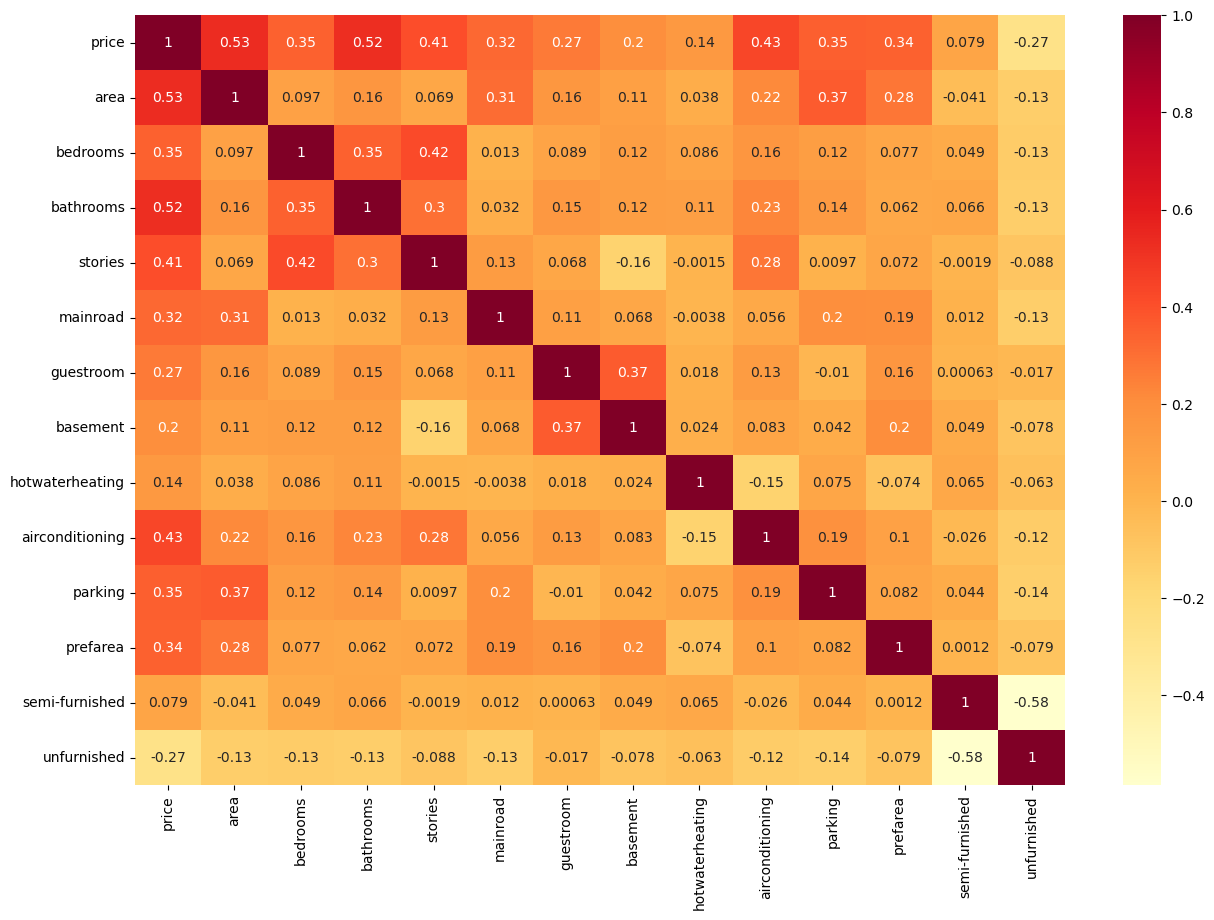

In [223]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (15, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlOrRd")
plt.show()

As you might have noticed, `area` seems to the correlated to `price` the most. Let's see a pairplot for `area` vs `price`.

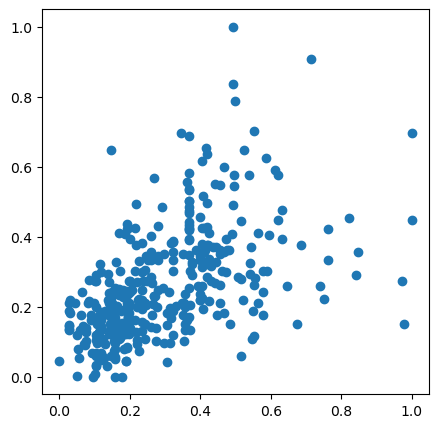

In [224]:
plt.figure(figsize=[5,5])
plt.scatter(df_train.area, df_train.price)
plt.show()

So, we pick `area` as the first variable and we'll try to fit a regression line to that.

### Dividing into X and Y sets for the model building

In [225]:
y_train = df_train.pop('price')
X_train = df_train

In [226]:
X_train.columns

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'semi-furnished', 'unfurnished'],
      dtype='object')

In [227]:
y_train.head()

359   0.17
19    0.62
159   0.32
35    0.55
28    0.58
Name: price, dtype: float64

## Step 5: Building a linear model

Fit a regression line through the training data using `statsmodels`. Remember that in `statsmodels`, you need to explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, `statsmodels` fits a regression line passing through the origin, by default.

In [228]:
import statsmodels.api as sm

# adding a constant
X_train_lm = sm.add_constant(X_train[['area']])

# create a first fittted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [229]:
# check the parameters obtained

lr.params

const   0.13
area    0.46
dtype: float64

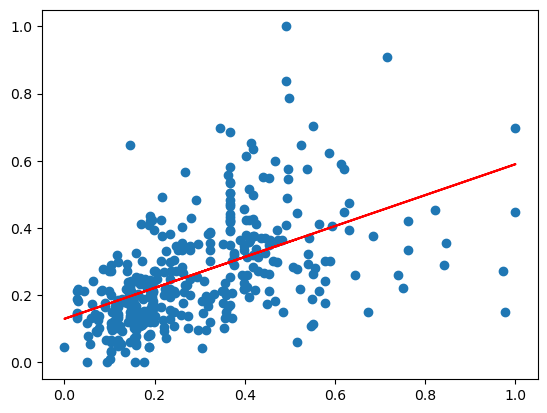

In [230]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 0.13 + 0.46*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [231]:
# Summary of the linear regression model obtained

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     149.6
Date:                Tue, 10 Oct 2023   Prob (F-statistic):           3.15e-29
Time:                        19:31:51   Log-Likelihood:                 227.23
No. Observations:                 381   AIC:                            -450.5
Df Residuals:                     379   BIC:                            -442.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1269      0.013      9.853      0.0

### Adding another variable

The R-squared value obtained is `0.283`. Since we have so many variables, we can clearly do better than this. So let's go ahead and add the second most highly correlated variable, i.e. `bathrooms`.

In [232]:
# Assign all the feature variables to x

X_train_lm = X_train[['area', 'bathrooms']]

In [233]:
# Builing a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)
lr = sm.OLS(y_train, X_train_lm).fit()

In [234]:
lr.params

const       0.10
area        0.40
bathrooms   0.30
dtype: float64

In [235]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     174.1
Date:                Tue, 10 Oct 2023   Prob (F-statistic):           2.51e-54
Time:                        19:31:51   Log-Likelihood:                 288.24
No. Observations:                 381   AIC:                            -570.5
Df Residuals:                     378   BIC:                            -558.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1046      0.011      9.384      0.000       0.083       0.127
area           0.3984      0.033     12.192      0.000       0.334       0.463
bathrooms      0.2984      0.025     11.945      0.000       0.249       0.347
==============================================================================
Omnibus:                       62.839   Durbin-Watson:                   2.157
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.790
Skew:                           0.784   Prob(JB):                     2.23e-37
Kurtosis:                       5.859   Cond. No.                         6.17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [236]:
X_train_lm = X_train[['area', 'bathrooms', 'airconditioning']]

In [237]:
X_train_lm = sm.add_constant(X_train_lm)
lr = sm.OLS(y_train, X_train_lm).fit()

In [238]:
lr.params

const             0.09
area              0.36
bathrooms         0.27
airconditioning   0.09
dtype: float64

In [239]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     146.4
Date:                Tue, 10 Oct 2023   Prob (F-statistic):           6.61e-63
Time:                        19:31:51   Log-Likelihood:                 310.99
No. Observations:                 381   AIC:                            -614.0
Df Residuals:                     377   BIC:                            -598.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0948      0.011      8.932      0.000       0.074       0.116
area                0.3581      0.031     11.414      0.000       0.296       0.420
bathrooms           0.2650      0.024     11.021      0.000       0.218       0.312
airconditioning     0.0870      0.013      6.916      0.000       0.062       0.112
==============================================================================
Omnibus:                       67.166   Durbin-Watson:                   2.112
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              167.372
Skew:                           0.863   Prob(JB):                     4.52e-37
Kurtosis:                       5.750   Cond. No.                         6.55
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We have improved the adjusted R-squared again. Now let's go ahead and add all the feature variables.

### Adding all the variables to the model

In [240]:
housing_data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished'],
      dtype='object')

In [241]:
# Building a linar model with all the variables

X_train_lm = sm.add_constant(X_train)
lr_1 = sm.OLS(y_train, X_train_lm).fit()

In [242]:
lr_1.params

const              0.02
area               0.23
bedrooms           0.05
bathrooms          0.19
stories            0.11
mainroad           0.05
guestroom          0.03
basement           0.02
hotwaterheating    0.08
airconditioning    0.07
parking            0.06
prefarea           0.06
semi-furnished     0.00
unfurnished       -0.03
dtype: float64

In [243]:
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     60.40
Date:                Tue, 10 Oct 2023   Prob (F-statistic):           8.83e-83
Time:                        19:31:51   Log-Likelihood:                 381.79
No. Observations:                 381   AIC:                            -735.6
Df Residuals:                     367   BIC:                            -680.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0200      0.021      0.955      0.340      -0.021       0.061
area                0.2347      0.030      7.795      0.000       0.175       0.294
bedrooms            0.0467      0.037      1.267      0.206      -0.026       0.119
bathrooms           0.1908      0.022      8.679      0.000       0.148       0.234
stories             0.1085      0.019      5.661      0.000       0.071       0.146
mainroad            0.0504      0.014      3.520      0.000       0.022       0.079
guestroom           0.0304      0.014      2.233      0.026       0.004       0.057
basement            0.0216      0.011      1.943      0.053      -0.000       0.043
hotwaterheating     0.0849      0.022      3.934      0.000       0.042       0.127
airconditioning     0.0669      0.011      5.899      0.000       0.045       0.089
parking             0.0607      0.018      3.365      0.001       0.025       0.096
prefarea            0.0594      0.012      5.040      0.000       0.036       0.083
semi-furnished      0.0009      0.012      0.078      0.938      -0.022       0.024
unfurnished        -0.0310      0.013     -2.440      0.015      -0.056      -0.006
==============================================================================
Omnibus:                       93.687   Durbin-Watson:                   2.093
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              304.917
Skew:                           1.091   Prob(JB):                     6.14e-67
Kurtosis:                       6.801   Cond. No.                         14.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Looking at the p-values, it looks like some of the variables aren't really significant (in the presence of other variables).

Maybe we could drop some?

We could simply drop the variable with the highest, non-significant p value. A better way would be to supplement this with the VIF information. 

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [244]:
# check for the VIF values of the feature variables

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [245]:
vif = pd.DataFrame()
vif['features'] = X_train.columns
vif['vif'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['vif'] = round(vif['vif'],2)
vif = vif.sort_values(by = 'vif', ascending=False)


In [246]:
vif

,features,vif
1,bedrooms,7.33
4,mainroad,6.02
0,area,4.67
3,stories,2.70
11,semi-furnished,2.19
9,parking,2.12
6,basement,2.02
12,unfurnished,1.82
8,airconditioning,1.77
2,bathrooms,1.67


We generally want a VIF that is less than 5. So there are clearly some variables we need to drop.

### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `semi-furnished` as it has a very high p-value of `0.938`. Let's go ahead and drop this variables

In [248]:
# Dropping highly correlated variables and insignificant variables

X = X_train.drop('semi-furnished', 1)

In [249]:
# Building a second fitted model

X_train_lm = sm.add_constant(X)
lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [250]:
lr_2.params

const              0.02
area               0.23
bedrooms           0.05
bathrooms          0.19
stories            0.11
mainroad           0.05
guestroom          0.03
basement           0.02
hotwaterheating    0.08
airconditioning    0.07
parking            0.06
prefarea           0.06
unfurnished       -0.03
dtype: float64

In [251]:
lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     65.61
Date:                Tue, 10 Oct 2023   Prob (F-statistic):           1.07e-83
Time:                        19:38:57   Log-Likelihood:                 381.79
No. Observations:                 381   AIC:                            -737.6
Df Residuals:                     368   BIC:                            -686.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0207      0.019      1.098      0.273      -0.016       0.058
area                0.2344      0.030      7.845      0.000       0.176       0.293
bedrooms            0.0467      0.037      1.268      0.206      -0.026       0.119
bathrooms           0.1909      0.022      8.697      0.000       0.148       0.234
stories             0.1085      0.019      5.669      0.000       0.071       0.146
mainroad            0.0504      0.014      3.524      0.000       0.022       0.079
guestroom           0.0304      0.014      2.238      0.026       0.004       0.057
basement            0.0216      0.011      1.946      0.052      -0.000       0.043
hotwaterheating     0.0849      0.022      3.941      0.000       0.043       0.127
airconditioning     0.0668      0.011      5.923      0.000       0.045       0.089
parking             0.0608      0.018      3.372      0.001       0.025       0.096
prefarea            0.0594      0.012      5.046      0.000       0.036       0.083
unfurnished        -0.0316      0.010     -3.096      0.002      -0.052      -0.012
==============================================================================
Omnibus:                       93.538   Durbin-Watson:                   2.092
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              303.844
Skew:                           1.090   Prob(JB):                     1.05e-66
Kurtosis:                       6.794   Cond. No.                         14.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [252]:
vif = pd.DataFrame()
vif['features'] = X.columns
vif['vif'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['vif'] = round(vif['vif'],2)
vif = vif.sort_values(by = 'vif', ascending=False)


In [253]:
vif

,features,vif
1,bedrooms,6.59
4,mainroad,5.68
0,area,4.67
3,stories,2.69
9,parking,2.12
6,basement,2.01
8,airconditioning,1.77
2,bathrooms,1.67
10,prefarea,1.51
5,guestroom,1.47


### Dropping the Variable and Updating the Model

As you can notice some of the variable have high VIF values as well as high p-values. Such variables are insignificant and should be dropped.

As you might have noticed, the variable `bedroom` has a significantly high VIF (`6.59`) and a high p-value (`0.206`) as well. Hence, this variable isn't of much use and should be dropped.

In [254]:
# Dropping highly correlated variables and insignificant variables

X = X.drop('bedrooms', 1)

In [256]:
X.columns

Index(['area', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement',
       'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'unfurnished'],
      dtype='object')

In [257]:
# Building a thrid fitted model

X_train_lm = sm.add_constant(X)
lr_3 = sm.OLS(y_train, X_train_lm).fit()

In [258]:
lr_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     71.31
Date:                Tue, 10 Oct 2023   Prob (F-statistic):           2.73e-84
Time:                        19:44:08   Log-Likelihood:                 380.96
No. Observations:                 381   AIC:                            -737.9
Df Residuals:                     369   BIC:                            -690.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0357      0.015      2.421      0.016       0.007       0.065
area                0.2347      0.030      7.851      0.000       0.176       0.294
bathrooms           0.1965      0.022      9.132      0.000       0.154       0.239
stories             0.1178      0.018      6.654      0.000       0.083       0.153
mainroad            0.0488      0.014      3.423      0.001       0.021       0.077
guestroom           0.0301      0.014      2.211      0.028       0.003       0.057
basement            0.0239      0.011      2.183      0.030       0.002       0.045
hotwaterheating     0.0864      0.022      4.014      0.000       0.044       0.129
airconditioning     0.0665      0.011      5.895      0.000       0.044       0.089
parking             0.0629      0.018      3.501      0.001       0.028       0.098
prefarea            0.0596      0.012      5.061      0.000       0.036       0.083
unfurnished        -0.0323      0.010     -3.169      0.002      -0.052      -0.012
==============================================================================
Omnibus:                       97.661   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              325.388
Skew:                           1.130   Prob(JB):                     2.20e-71
Kurtosis:                       6.923   Cond. No.                         10.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [259]:
# calculating the VIFs again for the new model

vif = pd.DataFrame()
vif['features'] = X.columns
vif['vif'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['vif'] = round(vif['vif'],2)
vif = vif.sort_values(by = 'vif', ascending=False)

In [260]:
vif

,features,vif
3,mainroad,4.79
0,area,4.55
2,stories,2.23
8,parking,2.10
5,basement,1.87
7,airconditioning,1.76
1,bathrooms,1.61
9,prefarea,1.50
4,guestroom,1.46
10,unfurnished,1.33


### Dropping the variable and updating the model

As you might have noticed, dropping `semi-furnised` decreased the VIF of `mainroad` as well such that it is now under 5. But from the summary, we can still see some of them have a high p-value. `basement` for instance, has a p-value of 0.03. We should drop this variable as well.

In [261]:
X = X.drop('basement', 1)

In [263]:
# Building a fourth fitted model

X_train_lm = sm.add_constant(X)
lr_4 = sm.OLS(y_train, X_train_lm).fit()

In [264]:
lr_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     77.18
Date:                Tue, 10 Oct 2023   Prob (F-statistic):           3.13e-84
Time:                        19:49:03   Log-Likelihood:                 378.51
No. Observations:                 381   AIC:                            -735.0
Df Residuals:                     370   BIC:                            -691.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0428      0.014      2.958      0.003       0.014       0.071
area                0.2335      0.030      7.772      0.000       0.174       0.293
bathrooms           0.2019      0.021      9.397      0.000       0.160       0.244
stories             0.1081      0.017      6.277      0.000       0.074       0.142
mainroad            0.0497      0.014      3.468      0.001       0.022       0.078
guestroom           0.0402      0.013      3.124      0.002       0.015       0.065
hotwaterheating     0.0876      0.022      4.051      0.000       0.045       0.130
airconditioning     0.0682      0.011      6.028      0.000       0.046       0.090
parking             0.0629      0.018      3.482      0.001       0.027       0.098
prefarea            0.0637      0.012      5.452      0.000       0.041       0.087
unfurnished        -0.0337      0.010     -3.295      0.001      -0.054      -0.014
==============================================================================
Omnibus:                       97.054   Durbin-Watson:                   2.099
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              322.034
Skew:                           1.124   Prob(JB):                     1.18e-70
Kurtosis:                       6.902   Cond. No.                         10.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [265]:
# calculating the VIFs again for the new model

vif = pd.DataFrame()
vif['features'] = X.columns
vif['vif'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['vif'] = round(vif['vif'],2)
vif = vif.sort_values(by = 'vif', ascending=False)

In [266]:
vif

,features,vif
3,mainroad,4.55
0,area,4.54
2,stories,2.12
7,parking,2.10
6,airconditioning,1.75
1,bathrooms,1.58
8,prefarea,1.47
9,unfurnished,1.33
4,guestroom,1.30
5,hotwaterheating,1.12


I am gonna remove the 'mainroad' and 'area' columns as the VIF has more than 3

In [267]:
X = X.drop('mainroad', 1)

In [268]:
X = X.drop('area', 1)

In [269]:
X.columns

Index(['bathrooms', 'stories', 'guestroom', 'hotwaterheating',
       'airconditioning', 'parking', 'prefarea', 'unfurnished'],
      dtype='object')

In [270]:
X_train_lm = sm.add_constant(X)
lr_4 = sm.OLS(y_train, X_train_lm).fit()

In [271]:
lr_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     69.37
Date:                Tue, 10 Oct 2023   Prob (F-statistic):           4.27e-69
Time:                        20:00:37   Log-Likelihood:                 337.76
No. Observations:                 381   AIC:                            -657.5
Df Residuals:                     372   BIC:                            -622.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1264      0.010     12.405      0.000       0.106       0.146
bathrooms           0.2083      0.024      8.773      0.000       0.162       0.255
stories             0.1146      0.019      6.047      0.000       0.077       0.152
guestroom           0.0554      0.014      3.909      0.000       0.028       0.083
hotwaterheating     0.0935      0.024      3.898      0.000       0.046       0.141
airconditioning     0.0768      0.012      6.173      0.000       0.052       0.101
parking             0.1206      0.019      6.400      0.000       0.084       0.158
prefarea            0.0924      0.013      7.371      0.000       0.068       0.117
unfurnished        -0.0413      0.011     -3.654      0.000      -0.063      -0.019
==============================================================================
Omnibus:                       86.984   Durbin-Watson:                   2.138
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              256.607
Skew:                           1.045   Prob(JB):                     1.90e-56
Kurtosis:                       6.434   Cond. No.                         6.12
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now as you can see, the VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only.

## Step 7: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [272]:
y_train_price = lr_4.predict(X_train_lm)

In [275]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

Text(0.5, 0, 'Errors')

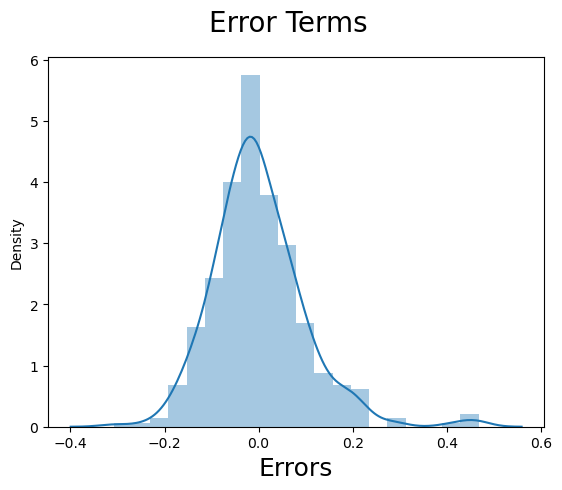

In [276]:
plt.show()

## Step 8: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fourth model.

#### Applying the scaling on the test sets

In [280]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

df_test[num_vars] = scaling.fit_transform(df_test[num_vars])

In [281]:
df_test.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
count,164.00,164.00,164.00,164.00,164.00,164.00,164.00,164.00,164.00,164.00,164.00,164.00,164.00,164.00
mean,0.28,0.25,0.35,0.11,0.27,0.87,0.20,0.35,0.03,0.35,0.21,0.24,0.42,0.33
std,0.19,0.17,0.25,0.19,0.28,0.34,0.40,0.48,0.17,0.48,0.29,0.43,0.50,0.47
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.15,0.13,0.33,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.24,0.22,0.33,0.00,0.33,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.38,0.32,0.33,0.33,0.33,1.00,0.00,1.00,0.00,1.00,0.33,0.00,1.00,1.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


## Dividing into X_test and y_test

In [282]:
y_test = df_test.pop('price')
X_test = df_test

In [283]:
# Adding constant variable to test dataframe
X_test_m4 = sm.add_constant(X_test)

In [284]:
# Creating X_test_m4 dataframe by dropping variables from X_test_m4

X_test_m4 = X_test_m4.drop(["bedrooms", "semi-furnished", "basement"], axis = 1)

In [285]:
X_test_m4 = X_test_m4.drop(["mainroad", "area"], axis = 1)

In [286]:
# Making predictions using the fourth model

y_pred_m4 = lr_4.predict(X_test_m4)

## Step 9: Model Evaluation

Let's now plot the graph for actual versus predicted values.

In [290]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m4,color='red')
plt.scatter(y_pred_m4, y_test,color='blue')
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

Text(0, 0.5, 'y_pred')

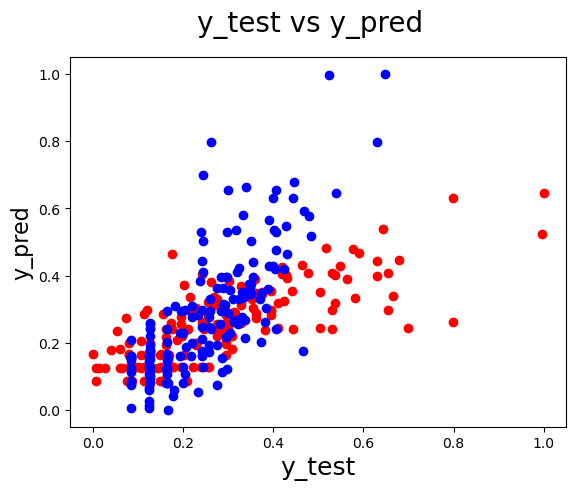

In [288]:
plt.show()

Overall we have a decent model, but we also acknowledge that we could do better. 

We have a couple of options:
1. Add new features (bathrooms/bedrooms, area/stories, etc.)
2. Build a non-linear model